--- Itération 1/10 ---


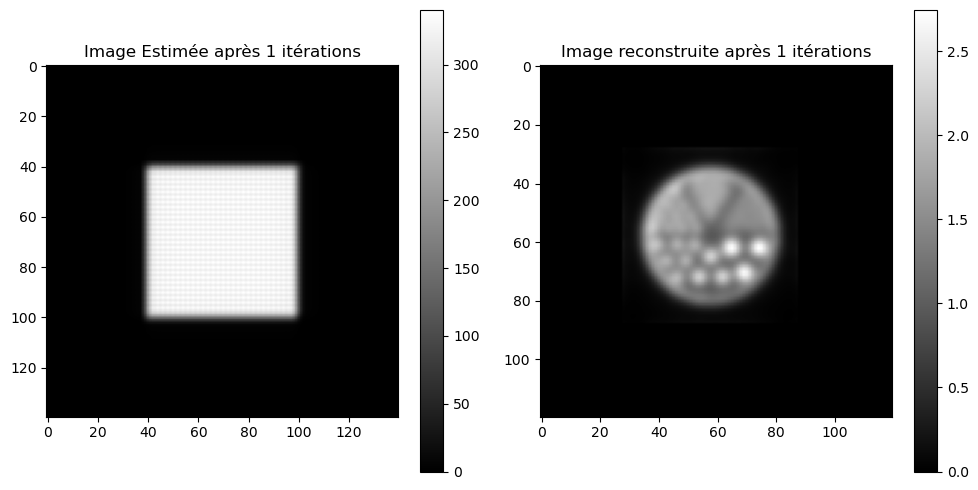

--- Itération 2/10 ---
Amélioration de la résolution : 10.27% par rapport à l'itération précédente


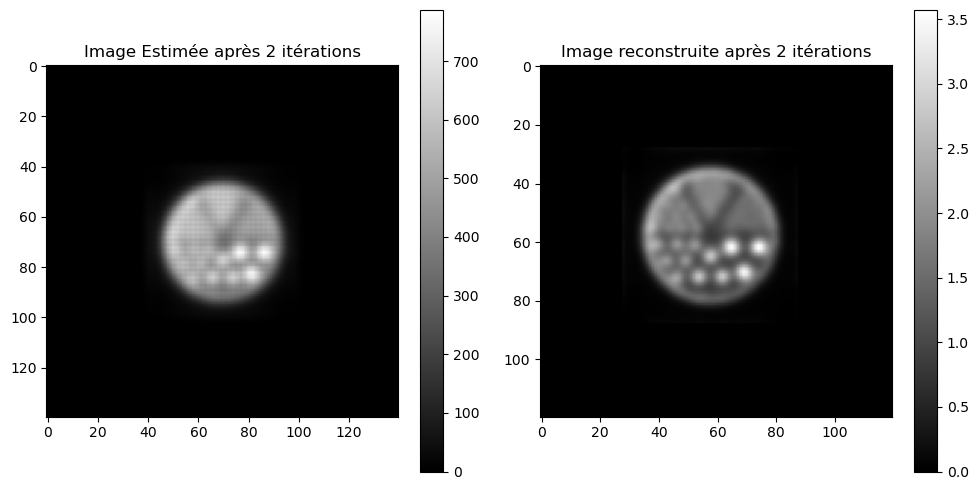

--- Itération 3/10 ---
Amélioration de la résolution : 5.25% par rapport à l'itération précédente


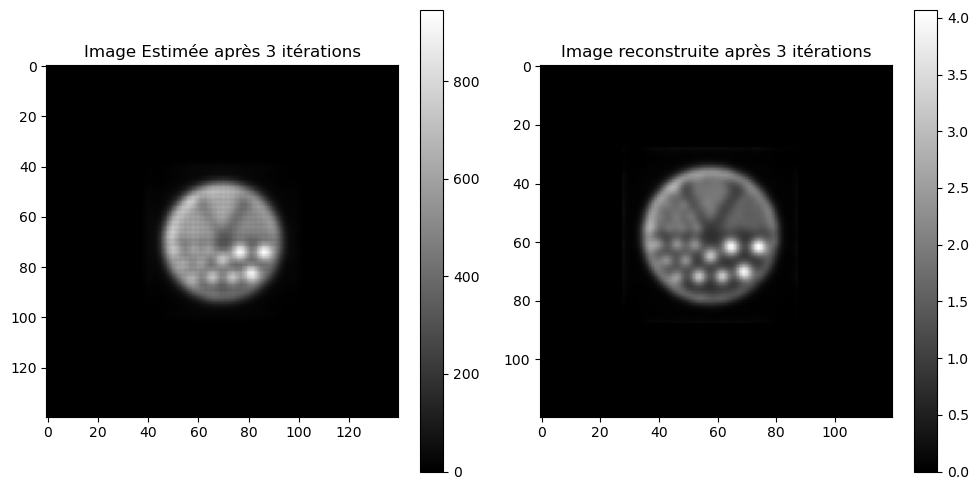

--- Itération 4/10 ---
Amélioration de la résolution : 3.46% par rapport à l'itération précédente


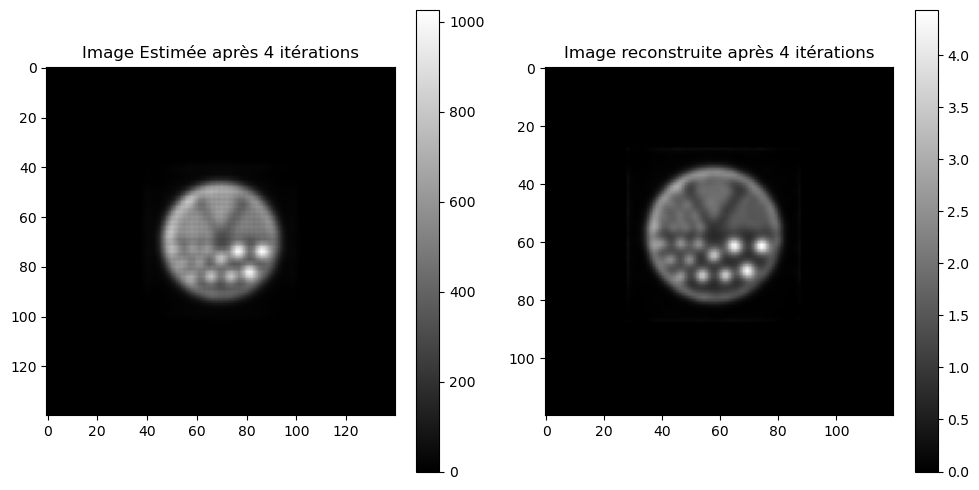

--- Itération 5/10 ---
Amélioration de la résolution : 2.49% par rapport à l'itération précédente


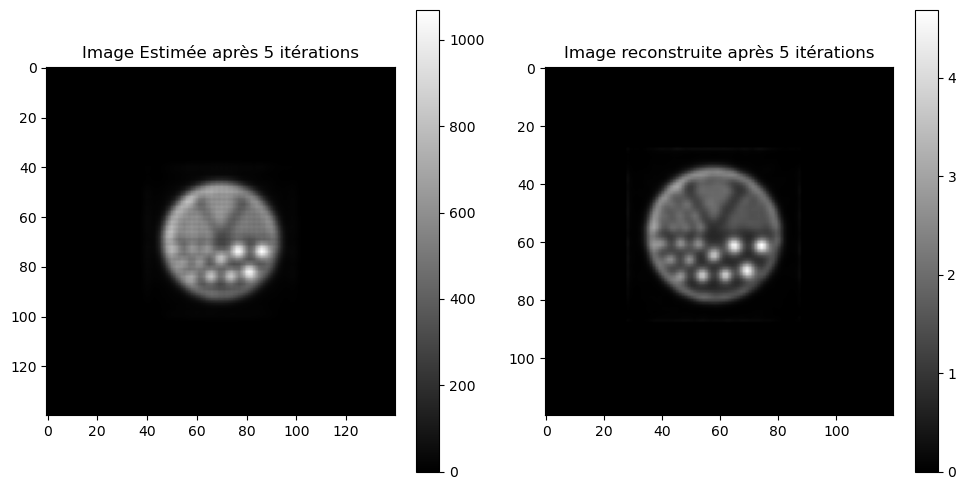

--- Itération 6/10 ---
Amélioration de la résolution : 1.89% par rapport à l'itération précédente


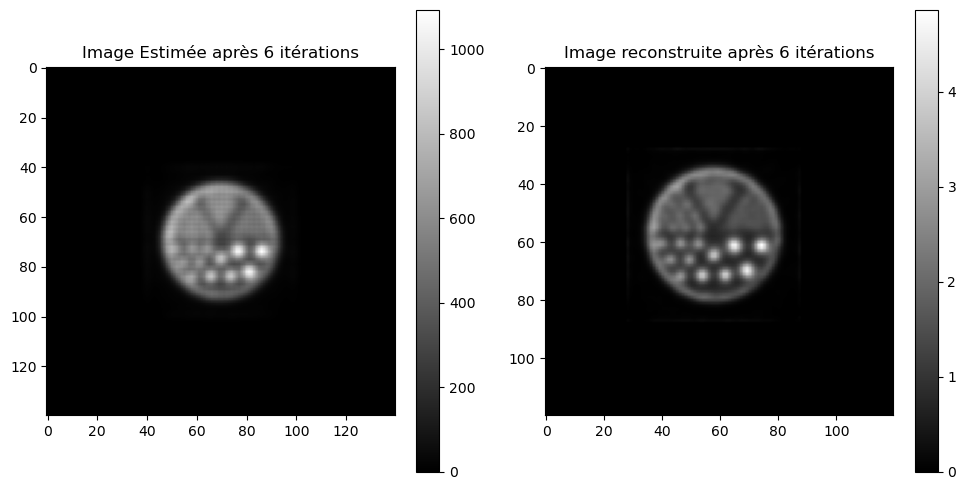

--- Itération 7/10 ---
Amélioration de la résolution : 1.48% par rapport à l'itération précédente


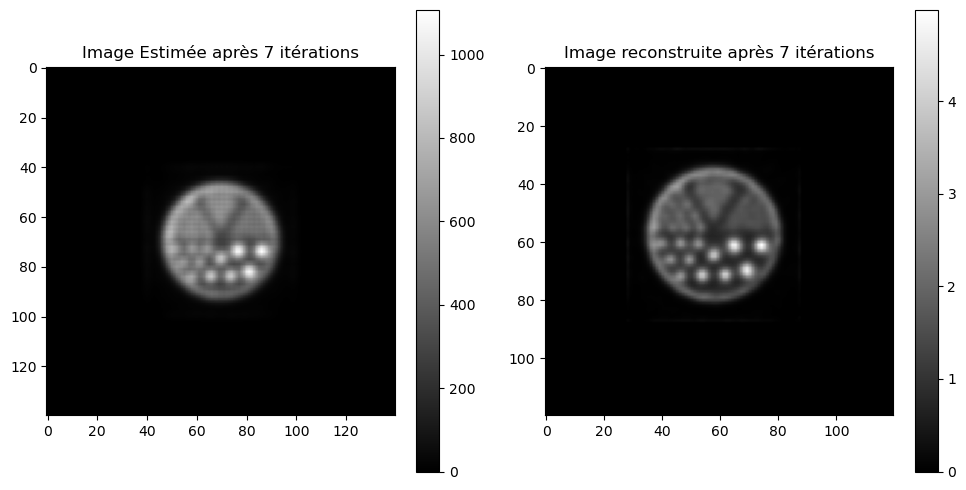

--- Itération 8/10 ---
Amélioration de la résolution : 1.20% par rapport à l'itération précédente


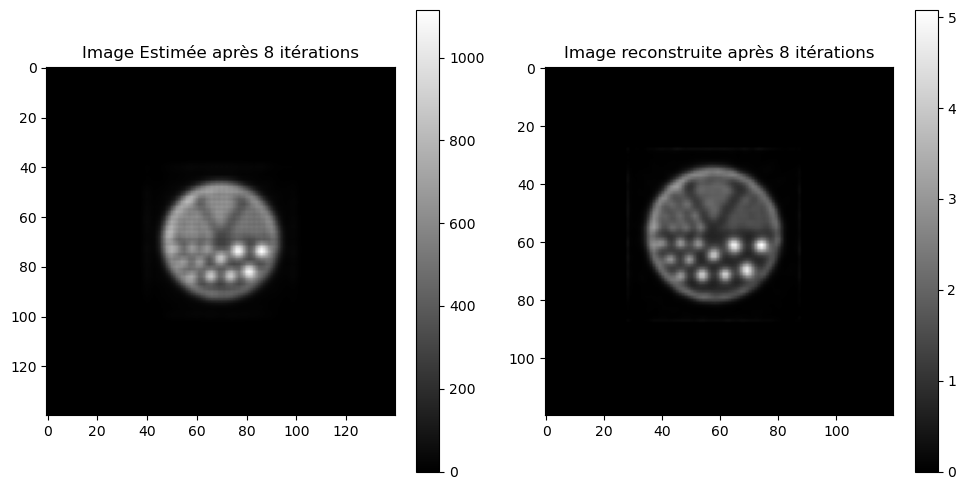

--- Itération 9/10 ---
Amélioration de la résolution : 1.00% par rapport à l'itération précédente


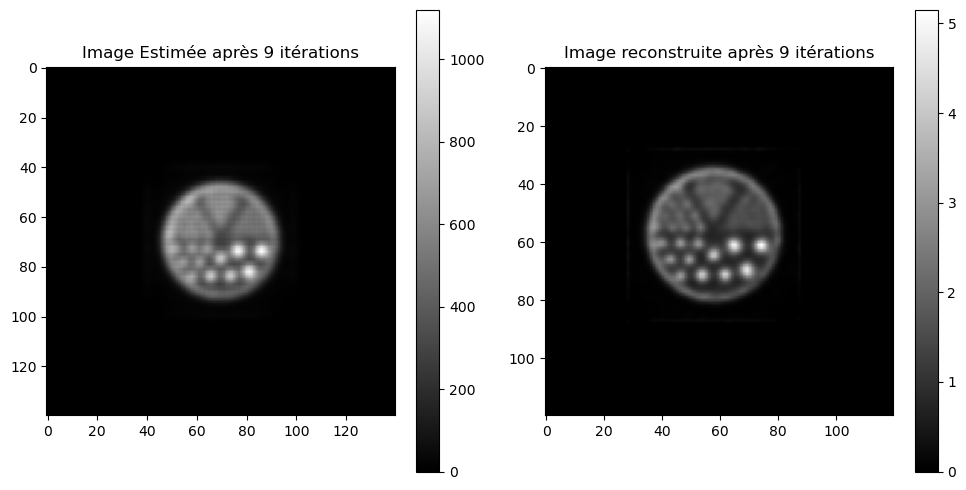

--- Itération 10/10 ---
Amélioration de la résolution : 0.86% par rapport à l'itération précédente


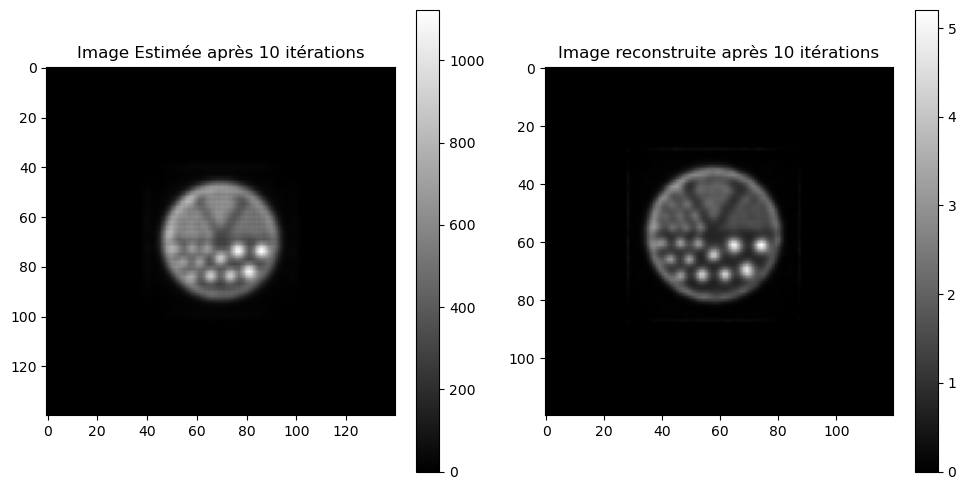

Amélioration entre la première et la dernière itération : 95.06%


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk

# Lecture des images
r = sitk.ReadImage('medical.mha')
R = sitk.GetArrayFromImage(r)
p = sitk.ReadImage('Derenzo_H17_5cm_cumul.mha')
p_mesuree = sitk.GetArrayFromImage(p)

# Redimensionnement de la première colonne
premiere_colonne = R[:, 0]
redim = premiere_colonne.reshape(25, 25)

# Paramètres
ecart = 28
nb_iteration = 10
f_n = np.ones((120, 120))
f_n_1 = np.zeros((120, 120))

# Fonction pour calculer la différence entre deux matrices (pourcentage de changement)
def amelioration(mat1, mat2):
    diff = np.abs(mat1 - mat2)
    return np.sum(diff) / np.sum(mat1) * 100

# Boucle MLEM
for loop in range(nb_iteration):
    print(f"--- Itération {loop + 1}/{nb_iteration} ---")
    
    p_est = np.zeros((140, 140))
    
    # Étape 1 : Estimation de l'image
    for n in range(ecart, 88):
        for m in range(ecart, 88):
            for i in range(25):
                for j in range(25):
                    # Calcul basé sur la parité de n et m
                    if (n - ecart) % 2 != 0:
                        p_est[i + n, j + m] += f_n[n, m] * redim[i - 1, j]
                    elif (m - ecart) % 2 != 0:
                        p_est[i + n, j + m] += f_n[n, m] * redim[i, j - 1]
                    else:
                        p_est[i + n, j + m] += f_n[n, m] * redim[i, j]

    # Visualisation de l'image estimée
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    im1 = ax1.imshow(p_est, cmap='gray')
    fig.colorbar(im1, ax=ax1)  
    ax1.set_title(f"Image Estimée après {loop + 1} itérations")
    

    # Remplacement des zéros pour éviter les divisions par zéro
    p_est[p_est == 0] = 1e-6

    # Étape 2 : Correction par rapport aux mesures
    p = np.zeros((140, 140))
    for n in range(ecart, 88):
        for m in range(ecart, 88):
            for i in range(25):
                for j in range(25):
                    p[n, m] += p_mesuree[i + n, j + m] * redim[i, j] / p_est[i + n, j + m]

    # Étape 3 : Mise à jour de f_n_1
    for i in range(ecart, 120 - ecart):
        for j in range(ecart, 120 - ecart):
            f_n_1[i, j] = f_n[i, j] * (1 / np.sum(redim)) * p[i, j]

    # Pourcentage d'amélioration
    if loop > 0:
        taux = amelioration(f_n, f_n_1)
        print(f"Amélioration de la résolution : {taux:.2f}% par rapport à l'itération précédente")
    
    if loop == 0 :
        f_init = f_n

    if loop == nb_iteration-1:
        f_final = f_n_1
        

    # Visualisation de l'image reconstruite après chaque itération
    im2 = ax2.imshow(f_n_1, cmap='gray')
    ax2.set_title(f"Image reconstruite après {loop + 1} itérations")
    fig.colorbar(im2, ax=ax2)
    plt.tight_layout()
    plt.show()
    

    # Sauvegarde de l'image
    nom_fichier = f'f_{loop + 1}_NEW.png'
    plt.imsave(nom_fichier, f_n_1, cmap='gray')

    # Mise à jour pour la prochaine itération
    f_n = np.copy(f_n_1)
    
    
    
amelioration_totale = amelioration(f_init, f_final)  # Où f_n_init est l'image de la première itération
print(f"Amélioration entre la première et la dernière itération : {amelioration_totale:.2f}%")